In [1]:
import pandas as pd
import os
import requests
import numpy as np
import json

# Gathering

Here I will read in the data from three sources.

- The twitter archive of the tweets
- A twitter api call on the tweets to get favorite count and retweet count
- The image file from the internet using the requests library

In [2]:
import tweepy

# Read in the config file with your personal keys, secrets, and tokens
with open('config_file.txt') as file:
    lines = file.readlines()
    consumer_key = lines[0].strip('\n')
    consumer_secret = lines[1].strip('\n')
    access_token = lines[2].strip('\n')
    access_secret = lines[3].strip('\n')
    
# Set up the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [3]:
# Read in twitter archive
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Grab the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)

In [5]:
# Create tsv of images
with open('images.csv', 'x') as file:
    file.write(images.text)

FileExistsError: [Errno 17] File exists: 'images.csv'

In [5]:
images_df = pd.read_csv('images.csv', sep = '\t')

In [6]:
file_name = 'tweet_json.txt'

In [7]:
# Create errors file
errors = open('erros.csv', 'x')
errors.write('tweet_id,deleted\n')

with open(file_name, 'x') as outfile:
    for tweet in tweets['tweet_id']:
        try:
            tweet_json = api.get_status(tweet)._json
            json.dump(tweet_json, outfile)
            outfile.write('\n')
        except Exception as e:
            print(tweet)
            errors.write(str(tweet) + ',y\n')
            
errors.close()
            


888202515573088257
873697596434513921
869988702071779329
867421006826221569
866816280283807744
861769973181624320
842892208864923648
827228250799742977
802247111496568832
775096608509886464
Rate limit reached. Sleeping for: 443
Rate limit reached. Sleeping for: 437


In [7]:
tweet_list = []

with open(file_name) as infile:
    for line in infile:
        data = json.loads(line)
        tweet_id = data['id_str']
        favorites = data['favorite_count']
        retweets = data['retweet_count']
        tweet_list.append({'tweet_id': tweet_id,
                           'favorite_count': favorites,
                           'retweet_count': retweets,
                           'deleted' : 'n'})
        
json_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'deleted'])

In [8]:
error_df = pd.read_csv('erros.csv')

In [9]:
error_df.head()

,tweet_id,deleted
0,888202515573088257,y
1,873697596434513921,y
2,869988702071779329,y
3,867421006826221569,y
4,866816280283807744,y


In [10]:
json_df = pd.concat([json_df, error_df], ignore_index = True)

In [11]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
deleted           2356 non-null object
favorite_count    2346 non-null float64
retweet_count     2346 non-null float64
tweet_id          2356 non-null object
dtypes: float64(2), object(2)
memory usage: 73.7+ KB


# Assessing

## Tidiness

- Have three data frames (tweets, json_df, images_df). Only need two
- Dog categories are seperate columns

## Quality

#### 'tweets' dataframe

- Some of the tweets have been deleted
- Datatypes are incorrect (tweet_id, timestamp, dog types)
- Some numerators are 0
- Some denominators are not 10

#### 'json_df' dataframe

- Datatypes are incorrect (favorite, retweet count)

#### 'images_df'

- Some tweets missing
- Dog names have various formats
- Some aren't dogs




In [12]:
images_df[images_df.p1_dog == False]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


# Cleaning

### 'tweets' dataframe

- Change datatypes to correct ones (tweet_id to string, timestamp to datetime) to start

In [13]:
tweets.tweet_id = tweets.tweet_id.astype(str)

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [15]:
tweets.timestamp = pd.to_datetime(tweets.timestamp, infer_datetime_format = True)

In [16]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Tidiness

- Merge json_df and tweets dataframe on tweet_id

In [17]:
json_df.tweet_id = json_df.tweet_id.astype(str)

In [18]:
tweets_df = tweets.merge(json_df, on='tweet_id')

In [19]:
tweets_df[tweets_df.deleted == 'y']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,deleted,favorite_count,retweet_count
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,y,NaN,NaN
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None,y,NaN,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,y,NaN,NaN
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo,y,NaN,NaN
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None,y,NaN,NaN
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None,y,NaN,NaN
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None,y,NaN,NaN
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None,y,NaN,NaN
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None,y,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,y,NaN,NaN


In [20]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
deleted                

- Convert dog type columns (pupper, floofer, etc) into one categorical column

In [21]:
melt1 = pd.melt(tweets_df[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']], id_vars = 'tweet_id', 
                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'dog_type')

In [22]:
melt1 = melt1[melt1.value != 'None']

In [23]:
melt1.drop('value', axis = 1, inplace = True)

In [24]:
tweets_df = tweets_df.merge(melt1, how = 'left', on = 'tweet_id')

In [25]:
tweets_df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,deleted,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,n,39152.0,8707.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,n,33532.0,6388.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,n,25276.0,4244.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,None,None,None,n,42510.0,8805.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,None,None,None,n,40672.0,9588.0,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,10,None,None,None,None,None,n,20402.0,3180.0,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,10,Jax,None,None,None,None,n,11958.0,2118.0,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,10,None,None,None,None,None,n,66163.0,19296.0,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,10,Zoey,None,None,None,None,n,28002.0,4341.0,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10,Cassie,doggo,None,None,None,n,32217.0,7575.0,doggo


In [26]:
tweets_df.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [27]:
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,deleted,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,n,39152.0,8707.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,n,33532.0,6388.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,n,25276.0,4244.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,n,42510.0,8805.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,n,40672.0,9588.0,NaN


- Convert dog_type to a categorical variable

In [28]:
tweets_df.dog_type = tweets_df.dog_type.astype('category')

In [29]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 17 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null datetime64[ns]
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
deleted                       2370 non-null object
favorite_count                2360 non-null float64
retweet_count                 2360 non-null float64
dog_type                      394 non-null category
dtypes: category(1),

In [30]:
tweets_df[tweets_df.tweet_id == '855851453814013952']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,deleted,favorite_count,retweet_count,dog_type
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,n,47320.0,18913.0,doggo
192,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,n,47320.0,18913.0,puppo


## Quality

#### 'tweets_df' dataframe
- Drop tweets that have been deleted
- Convert remaining incorrect types

In [31]:
tweets_df.deleted.value_counts()

n    2360
y      10
Name: deleted, dtype: int64

In [32]:
tweets_df = tweets_df[tweets_df.deleted == 'n']

In [33]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2369
Data columns (total 17 columns):
tweet_id                      2360 non-null object
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2360 non-null datetime64[ns]
source                        2360 non-null object
text                          2360 non-null object
retweeted_status_id           174 non-null float64
retweeted_status_user_id      174 non-null float64
retweeted_status_timestamp    174 non-null object
expanded_urls                 2301 non-null object
rating_numerator              2360 non-null int64
rating_denominator            2360 non-null int64
name                          2360 non-null object
deleted                       2360 non-null object
favorite_count                2360 non-null float64
retweet_count                 2360 non-null float64
dog_type                      392 non-null category
dtypes: category(1),

In [34]:
tweets_df.favorite_count = tweets_df.favorite_count.astype(int)

In [35]:
tweets_df.retweet_count = tweets_df.retweet_count.astype(int)

- Drop cells with numerator of 0 or denominators that are not 10

In [36]:
tweets_df = tweets_df[tweets_df.rating_numerator != 0]

In [37]:
tweets_df = tweets_df[tweets_df.rating_denominator == 10]

In [38]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2369
Data columns (total 17 columns):
tweet_id                      2336 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2336 non-null datetime64[ns]
source                        2336 non-null object
text                          2336 non-null object
retweeted_status_id           174 non-null float64
retweeted_status_user_id      174 non-null float64
retweeted_status_timestamp    174 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2336 non-null int64
rating_denominator            2336 non-null int64
name                          2336 non-null object
deleted                       2336 non-null object
favorite_count                2336 non-null int32
retweet_count                 2336 non-null int32
dog_type                      392 non-null category
dtypes: category(1), dat

#### 'images_df' dataframe
- Format dog names so they are consistent (no underscores and all lowercase)

In [42]:
images_df.p1 = images_df.p1.str.lower().str.replace('_',' ')
images_df.p2 = images_df.p2.str.lower().str.replace('_',' ')
images_df.p3 = images_df.p3.str.lower().str.replace('_',' ')

In [43]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


- Now some of the predictions in p1 (the highest confidence guess) are not dogs. For these I am going to drop that row.

In [44]:
images_df = images_df[images_df.p1_dog == True]

In [46]:
images_df[images_df.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [47]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


- The tweets that are missing from the images dataframe can be considered unrecoverable data. It would be possible to write a script to loop through the non-deleted tweets and grab the images, but since the images aren't necessary for the visualizations and analysis that I am going to do, I will simply use the ones I have.

# Analysis

In [48]:
import matplotlib.pyplot as plt
% matplotlib inline

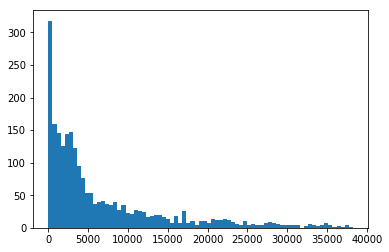

In [58]:
plt.hist(tweets_df.favorite_count, 75,
         range=[np.percentile(tweets_df.favorite_count, 2.5), np.percentile(tweets_df.favorite_count, 97.5)]);

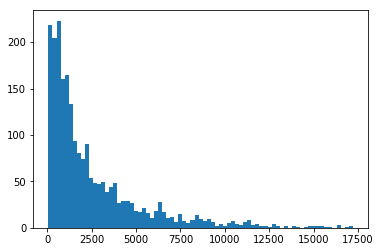

In [59]:
plt.hist(tweets_df.retweet_count, 75,
         range=[np.percentile(tweets_df.retweet_count, 2.5), np.percentile(tweets_df.retweet_count, 97.5)]);

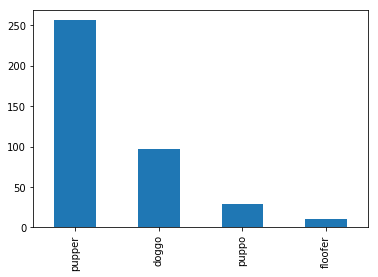

In [60]:
tweets_df.dog_type.value_counts().plot(kind='bar');

In [63]:
tweets_df.groupby('dog_type')[['favorite_count', 'retweet_count']].describe()

favorite_count                                                        \
                  count          mean           std     min      25%      50%   
dog_type                                                                        
doggo              97.0  15216.164948  19546.526128     0.0  5207.00   9939.0   
floofer            10.0  11530.700000  10125.334892  1593.0  4341.75   8565.5   
pupper            256.0   6743.363281  10972.878524     0.0  2090.75   3143.0   
puppo              29.0  18875.206897  28489.660639     0.0  4559.00  10004.0   

                             retweet_count                                    \
               75%       max         count         mean           std    min   
dog_type                                                                       
doggo     16288.00  129424.0          97.0  7174.639175  12175.149417   36.0   
floofer   15806.25   32896.0          10.0  4012.400000   5170.802951  490.0   
pupper     7374.25  124497.0         256.0  2823.035156   4257.170629   26.0   
puppo     19552.00  143969.0          29.0  6742.689655   9653.528105  176.0   

                                            
              25%     50%     75%      max  
dog_type                                    
doggo     2014.00  3258.0  5653.0  78274.0  
floofer   1364.50  2832.5  3670.5  18136.0  
pupper     709.25  1333.5  3213.0  36818.0  
puppo     1459.00  3180.0  8380.0  49747.0

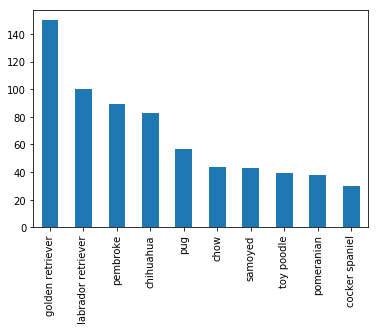

In [65]:
images_df.p1.value_counts().nlargest(10).plot(kind='bar');